## Import Dependencies

In [6]:
import sklearn
import pandas as pd
import numpy as np
import os

## Import Data

In [7]:
df=pd.read_csv(os.path.join('data','train.csv'),index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Statistical analysis

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [11]:
print(df.shape)
print(df.columns)

(891, 8)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [12]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Fill missing values

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
numerical_imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
numerical_imputer.fit(df[['Age']])

SimpleImputer()

In [15]:
df[['Age']]=numerical_imputer.fit_transform(df[['Age']])
df[['Age']].isnull().sum()

Age    0
dtype: int64

In [16]:
categorical_imputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
categorical_imputer.fit(df[['Embarked']])

SimpleImputer(strategy='most_frequent')

In [17]:
df[['Embarked']]=categorical_imputer.fit_transform(df[['Embarked']])
df[['Embarked']].isnull().sum()

Embarked    0
dtype: int64

In [19]:
x=df.drop(columns=['Survived'],axis=1)
y=pd.DataFrame(df['Survived'])

In [20]:
y.value_counts()

Survived
0           549
1           342
dtype: int64

In [54]:
class_labels=['Died','Survived']

### Split data for training and testing

In [22]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 7), (712, 1), (179, 7), (179, 1))

In [44]:
y_train=np.squeeze(y_train.to_numpy())
y_test=np.squeeze(y_test.to_numpy())

## Training Pipelines

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
numerical_features=x_train.select_dtypes(exclude='object').columns
numerical_pipeline=make_pipeline(StandardScaler())
numerical_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

In [29]:
categorical_features=x_train.select_dtypes('object').columns
categorical_pipeline=make_pipeline(OneHotEncoder())
categorical_pipeline

Pipeline(steps=[('onehotencoder', OneHotEncoder())])

In [30]:
transformer=ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_features),
    ('categorical_pipeline',categorical_pipeline,categorical_features)
])
transformer

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 Index(['Sex', 'Embarked'], dtype='object'))])

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [32]:
LRpipeline=make_pipeline(transformer,LogisticRegression())
KNCpipeline=make_pipeline(transformer,KNeighborsClassifier())
GNBpipeline=make_pipeline(transformer,GaussianNB())
RFCpipeline=make_pipeline(transformer,RandomForestClassifier())
ABCpipeline=make_pipeline(transformer,AdaBoostClassifier())

## Fit the pipelines

In [45]:
LRpipeline.fit(x_train,y_train)
KNCpipeline.fit(x_train,y_train)
GNBpipeline.fit(x_train,y_train)
RFCpipeline.fit(x_train,y_train)
ABCpipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('adaboostclassifier', AdaBoostClassifier())])

In [46]:
print(f'LogisticRegression : {LRpipeline.score(x_test,y_test)}')
print(f'KNeighborsClassifier: {KNCpipeline.score(x_test,y_test)}')
print(f'GaussianNB : {GNBpipeline.score(x_test,y_test)}')
print(f'RandomForestClassifier : {RFCpipeline.score(x_test,y_test)}')
print(f'AdaBoostClassifier : {ABCpipeline.score(x_test,y_test)}')

LogisticRegression : 0.8435754189944135
KNeighborsClassifier: 0.8044692737430168
GaussianNB : 0.8268156424581006
RandomForestClassifier : 0.7988826815642458
AdaBoostClassifier : 0.8435754189944135


In [41]:
import pickle

In [51]:
best_score=0
for i in range(20):
    GNBpipeline.fit(x_train,y_train)
    score=GNBpipeline.score(x_test,y_test)
    if score>best_score:
        best_score=score
        with open(os.path.join('models','titanic_GNB_model.pkl'),'wb') as f:
            pickle.dump(GNBpipeline,f)
            f.close()

with open(os.path.join('models','titanic_GNB_model.pkl'),'rb') as f:
    GNBpipeline=pickle.load(f)
    f.close()

print(f'Train accuracy: {GNBpipeline.score(x_train,y_train)}')
print(f'Best Test accuracy: {GNBpipeline.score(x_test,y_test)}')

Train accuracy: 0.7837078651685393
Best Test accuracy: 0.8268156424581006


In [52]:
import random

In [69]:
x=random.randint(0,169)
y_preds=ABCpipeline.predict(x_test)
print('Actual','Predicted')
for i in range(x,x+10):
    print(f'{class_labels[y_test[i]]}   {class_labels[y_preds[i]]}')

Actual Predicted
Survived   Survived
Died   Survived
Died   Died
Survived   Survived
Survived   Survived
Survived   Survived
Died   Died
Died   Died
Survived   Survived
Died   Died


In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

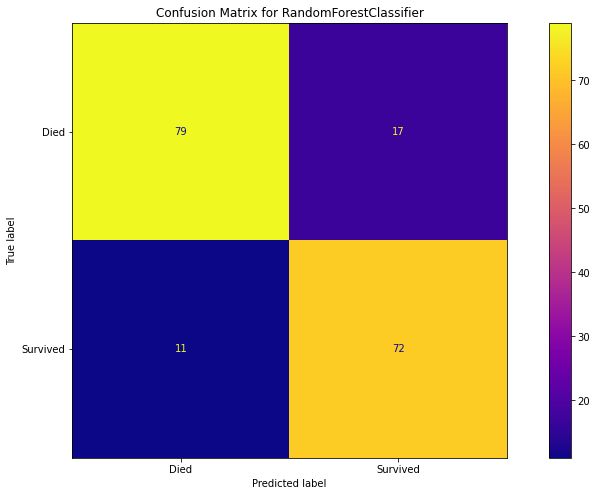

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, ax=ax,cmap=plt.cm.plasma)
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)
ax.set_title("Confusion Matrix for RandomForestClassifier")
plt.show()

## Making predictions for the test.csv file

In [84]:
test_df=pd.read_csv(os.path.join('data','test.csv'),index_col='PassengerId')
test_df.drop(columns=['Name','Ticket','Cabin'],inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [85]:
test_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [86]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [87]:
numerical_imputer=SimpleImputer()
numerical_imputer.fit(test_df[['Age','Fare']])

SimpleImputer()

In [88]:
test_df[['Age','Fare']]=numerical_imputer.fit_transform(test_df[['Age','Fare']])
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [92]:
test_df.sort_index(inplace=True)

In [164]:
with open(os.path.join('models','titanic_ABC_model.pkl'),'rb') as f:
    ABCpipeline=pickle.load(f)
    f.close()

test_preds=ABCpipeline.predict(test_df)
submission=pd.DataFrame(np.squeeze(pd.DataFrame(test_df.index).to_numpy()),columns=['PassengerId'])
submission['Survived']=test_preds
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [167]:
submission.to_csv(os.path.join('predictions','submission.csv'),index=False)